In [1]:
from zipfile import ZipFile
import pandas as pd


In [2]:
df = pd.read_csv('goodreads_train.csv.zip')

In [25]:
df.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text',
       'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes',
       'n_comments'],
      dtype='object')

In [33]:
pip install pandas_profiling

     |████████████████████████████████| 262 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 2.4 MB/s ta 0:00:01
     |████████████████████████████████| 306 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 667 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 812 kB 1.7 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=67de443113c470a971f5e8302e12f3db1bddd820c86e5f072503c853cc006a00
  Stored in directory: /Users/derek/Library/Caches/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295198 sha256=3da927da60b1f27566255de85ee16b2c12411fc5612348f7fe2fc65fb7873c61
  Stored in directory: /Users/derek/Library/Caches/pip/wheels/48/a1/7f/096c1269d6bf78d4768180602579b35a1e8cb1250bb4b40c74
Successfully built htmlmin imagehas

In [36]:
from pandas_profiling import ProfileReport
profile = ProfileReport(X_train, title="Pandas Profiling Report")

In [39]:
profile.to_file("your_report.html")

NotImplementedError: 

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
X = df['review_text'].astype('U')
y = df['rating'].astype('U')
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, stratify = y)

In [31]:
X_train

777193    Not as fun as the first. Really dragged for me...
333376    I think I'm tapped out on this series at book ...
775330    i first read the abridge version of this book ...
757702    I hate cliffhangers. I just, totally, insanely...
64433     I really REALLY REALLY wanted to like this. I ...
                                ...                        
435039    I read this one as part of Don't Read in the C...
164794    This one wrecked me! I'm quite sure that I was...
51673     Fire upon Deep \n It has some interesting conc...
277652    Earlier this month, I read Fangirl, a Rainbow ...
194479    Interesting concept- if you can handle the cra...
Name: review_text, Length: 720000, dtype: object

In [ ]:
pipe = Pipeline([('tfidf_vectorizer',TfidfVectorizer(lowercase = True,
                                                     stop_words = 'english',
                                                    analyzer = 'word')),
                 
                 ('naive_bayes', MultinomialNB())])

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)

In [24]:
y_val.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

[[   90     6     1     1     4     3]
 [    0     0     0     0     0     0]
 [   17    30    16     3     7     3]
 [  490   945  2079  2046   455    69]
 [ 4250  4342 11832 33804 52959 28983]
 [ 1351   421   597  1940  9313 23943]]
0.4391888888888889


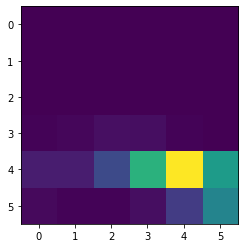

In [4]:

pipe.fit(list(X_train), list(y_train))
y_pred = pipe.predict(X_val)
print(confusion_matrix(y_pred, y_val))
print(accuracy_score(y_pred, y_val))
plt.imshow(confusion_matrix(y_pred, y_val))

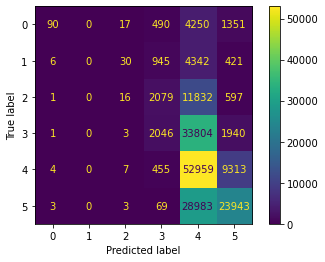

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
plot_confusion_matrix(pipe, X_val, y_val)  
plt.show()

In [17]:
len(y_pred)

180000

In [5]:
df['rating'].value_counts()

4    313688
5    265007
3    188972
2     72627
0     30988
1     28718
Name: rating, dtype: int64

In [11]:
df.count()

user_id         900000
book_id         900000
review_id       900000
rating          900000
review_text     900000
date_added      900000
date_updated    900000
read_at         808234
started_at      625703
n_votes         900000
n_comments      900000
dtype: int64

In [8]:
df_test = pd.read_csv('goodreads_test.csv.zip')

In [20]:
X_test = df_test['review_text']
y_pred  = pipe.predict(X_test)

In [21]:
df_test['rating'] = y_pred.astype(float)

In [22]:
df_test.to_csv('submission.csv',columns = ['review_id', 'rating'],
               header = ['review_id', 'rating'], index = False)

In [23]:
df_sample = df.sample(frac = 0.3)
df_sample['rating'].value_counts()

4    93780
5    79566
3    56794
2    22002
0     9214
1     8644
Name: rating, dtype: int64